In [3]:
import pandas as pd
import numpy as np
from pandas import DataFrame
import matplotlib.pyplot as plt
import seaborn as sns

import datetime
import time

import tweepy
import json

from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

from TwitterSearch import *

In [4]:
# prep for visualization
sns.set()
base_color = sns.color_palette()[0]

In [5]:
def check_hashtag(single_tweet):
    '''check whether tweet has any hashtags'''
    return len(single_tweet['entities']['hashtags']) > 0

def check_url(single_tweet):
    '''check whether tweet has any urls attached'''
    return len(single_tweet['entities']['urls']) > 0

def check_retweet(single_tweet):
    '''
    check whether tweet is a RT. If yes:
    return name & user name of the RT'd user.
    otherwise just return nones
    '''
    if 'retweeted_status' in single_tweet.keys():
        return (single_tweet['retweeted_status']['user']['screen_name'],
                single_tweet['retweeted_status']['user']['name'])
    else:
        return (None,None)


def check_reply_to(single_tweet):
    '''
    check whether tweet is a reply. If yes:
    return name & user name of the user that's replied to.
    otherwise just return nones
    '''
    if 'in_reply_to_screen_name' in single_tweet.keys():
        name = None
        for user in single_tweet['entities']['user_mentions']:
            if user['screen_name'] == single_tweet['in_reply_to_screen_name']:
                name = user['name']
                break
        return (single_tweet['in_reply_to_screen_name'],name)
    else:
        return (None,None)


def create_dataframe(tweets):
    '''
    create a pandas dataframe from our tweet jsons
    '''
    
    # initalize empty lists
    utc_time = []
    hashtag = []
    url = []
    retweet_user_name = []
    retweet_name = []
    retweets_count = []
    favorites_count = []
    reply_user_name = []
    reply_name = []
    text = []
    corona = []
    
    # iterate over all tweets and extract data
    for single_tweet in tweets:
        utc_time.append(time.strftime('%Y-%m-%d %H:%M:%S', time.strptime(single_tweet['created_at'],'%a %b %d %H:%M:%S +0000 %Y')))
        hashtag.append(check_hashtag(single_tweet))
        url.append(check_url(single_tweet))
        retweet = check_retweet(single_tweet)
        retweet_user_name.append(retweet[0])
        retweet_name.append(retweet[1])
        favorites_count.append(single_tweet['favorite_count'])
        retweets_count.append(single_tweet['retweet_count'])
        reply = check_reply_to(single_tweet)
        reply_user_name.append(reply[0])
        reply_name.append(reply[1])
        text.append(single_tweet['text'])
        if "corona" in single_tweet["text"] or "covid" in single_tweet["text"] or "virus" in single_tweet["text"]:
            c = 1 
        else:
            c = 0
        corona.append(c)
        
    # convert the whole shebang into a pandas dataframe
    dataframe = pd.DataFrame(data= {
                    'utc_time' : utc_time,
                    'hashtag' : hashtag,
                    'url' : url,
                    'retweet_user_name' : retweet_user_name,
                    'retweet_name' : retweet_name,
                    'retweets_count' : retweets_count,
                    'favorites_count' : favorites_count,
                    'reply_user_name' : reply_user_name,
                    'reply_name' : reply_name,
                    'text' : text,
                    'corona' : corona,
    })
    return dataframe

def create_dataframe_j(tweets):
    '''
    create a pandas dataframe from our tweet jsons
    '''
    
    # initalize empty lists
    utc_time = []
    hashtag = []
    url = []
    retweet_user_name = []
    retweet_name = []
    retweets_count = []
    favorites_count = []
    reply_user_name = []
    reply_name = []
    text = []
    corona = []
    
    
    # iterate over all tweets and extract data
    for single_tweet in tweets:
        utc_time.append(time.strftime('%Y-%m-%d %H:%M:%S', time.strptime(single_tweet['created_at'],'%a %b %d %H:%M:%S +0000 %Y')))
        hashtag.append(check_hashtag(single_tweet))
        url.append(check_url(single_tweet))
        retweet = check_retweet(single_tweet)
        retweet_user_name.append(retweet[0])
        retweet_name.append(retweet[1])
        favorites_count.append(single_tweet['favorite_count'])
        retweets_count.append(single_tweet['retweet_count'])
        reply = check_reply_to(single_tweet)
        reply_user_name.append(reply[0])
        reply_name.append(reply[1])
        text.append(single_tweet['text'])
        if "緊急事態" in single_tweet["text"] or "コロナ" in single_tweet["text"] or "自粛" in single_tweet["text"]:
            c = 1 
        else:
            c = 0
        corona.append(c)
        
    # convert the whole shebang into a pandas dataframe
    dataframe = pd.DataFrame(data= {
                    'utc_time' : utc_time,
                    'hashtag' : hashtag,
                    'url' : url,
                    'retweet_user_name' : retweet_user_name,
                    'retweet_name' : retweet_name,
                    'retweets_count' : retweets_count,
                    'favorites_count' : favorites_count,
                    'reply_user_name' : reply_user_name,
                    'reply_name' : reply_name,
                    'text' : text,
                    'corona' : corona,
    })
    return dataframe

# Gather

### Download Twitter data from Twitter API

Creating a StreamListener

In [6]:
consumer_key = 'cU1BKKePy25kYYClLNagnqCCw'
consumer_secret = 'i8qW4C9Xm3WWBU66hzosbwpee8z6q2Re4AVUZMYefgB9gus8V4'
access_token = '96572372-ngZbEXvFdr4i7JAeK5EgVQ5tojqo7pBb0spEUXAYT'
access_secret = 'JAHS8MWR0CGKqIrz9tBGIBf6MgxiDL3IDhqUbPNEPylSu'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth,wait_on_rate_limit=True, parser=tweepy.parsers.JSONParser(),wait_on_rate_limit_notify=True)

In [7]:
screen_name = "realDonaldTrump"

tweets = api.user_timeline(screen_name = screen_name, count=200, exclude_replies= False, include_rts= False)
all_tweets = []
all_tweets.extend(tweets)
oldest_id = tweets[-1]["id"]

while True:
    tweets = api.user_timeline(screen_name = screen_name, count=200, max_id = oldest_id - 1 ,exclude_replies= False, include_rts= False)
    if len(tweets) == 0:
        break
    oldest_id = tweets[-1]["id"]
    all_tweets.extend(tweets)
    print('N of tweets downloaded till now {}'.format(len(all_tweets)))

N of tweets downloaded till now 193
N of tweets downloaded till now 276
N of tweets downloaded till now 365
N of tweets downloaded till now 456
N of tweets downloaded till now 563
N of tweets downloaded till now 603
N of tweets downloaded till now 684
N of tweets downloaded till now 786
N of tweets downloaded till now 923
N of tweets downloaded till now 1018
N of tweets downloaded till now 1129
N of tweets downloaded till now 1197
N of tweets downloaded till now 1251
N of tweets downloaded till now 1340
N of tweets downloaded till now 1417
N of tweets downloaded till now 1431


In [8]:
df_trump = create_dataframe(all_tweets)

In [9]:
df_trump

,utc_time,hashtag,url,retweet_user_name,retweet_name,retweets_count,favorites_count,reply_user_name,reply_name,text,corona
0,2020-05-06 13:06:13,False,False,None,None,1887,8453,realDonaldTrump,None,"....to it, as appropriate. The Task Force will...",0
1,2020-05-06 13:06:09,False,True,None,None,1858,8367,realDonaldTrump,None,"....gloves, gowns etc. are now plentiful. The ...",0
2,2020-05-06 13:06:06,False,True,None,None,1131,4308,realDonaldTrump,None,"....produced in the thousands, and we have man...",0
3,2020-05-06 13:05:58,False,True,None,None,3289,14077,None,None,"The White House CoronaVirus Task Force, headed...",0
4,2020-05-06 03:22:09,False,False,None,None,11821,51810,None,None,Thank you @Honeywell! https://t.co/4jH6NF63XI,0
...,...,...,...,...,...,...,...,...,...,...,...
1426,2020-01-22 16:17:33,False,True,None,None,22831,92943,None,None,“Not the Senate’s job to mop up the mess made ...,0
1427,2020-01-22 16:01:53,False,False,None,None,20100,72443,None,None,THANK YOU @WEF! https://t.co/rQWBqJy7za,0
1428,2020-01-22 13:26:39,False,False,None,None,22839,139001,None,None,They are taking the nomination away from Berni...,0
1429,2020-01-22 13:23:33,False,True,None,None,7141,33185,None,None,Steyer is a major loser. Just doesn’t get it. ...,0


In [10]:
df_trump.to_csv('trump.csv')

In [11]:
screen_name = "BorisJohnson"

tweets = api.user_timeline(screen_name = screen_name, count=200, exclude_replies= False, include_rts= False)
all_tweets = []
all_tweets.extend(tweets)
oldest_id = tweets[-1]["id"]

while True:
    tweets = api.user_timeline(screen_name = screen_name, count=200, max_id = oldest_id - 1 ,exclude_replies= False, include_rts= False)
    if len(tweets) == 0:
        break
    oldest_id = tweets[-1]["id"]
    all_tweets.extend(tweets)
    print('N of tweets downloaded till now {}'.format(len(all_tweets)))

N of tweets downloaded till now 235
N of tweets downloaded till now 413
N of tweets downloaded till now 565
N of tweets downloaded till now 714
N of tweets downloaded till now 822
N of tweets downloaded till now 933
N of tweets downloaded till now 1050
N of tweets downloaded till now 1175
N of tweets downloaded till now 1327
N of tweets downloaded till now 1491
N of tweets downloaded till now 1658
N of tweets downloaded till now 1839
N of tweets downloaded till now 1984
N of tweets downloaded till now 2174
N of tweets downloaded till now 2354
N of tweets downloaded till now 2398


In [12]:
df_johnson = create_dataframe(all_tweets)
df_johnson

,utc_time,hashtag,url,retweet_user_name,retweet_name,retweets_count,favorites_count,reply_user_name,reply_name,text,corona
0,2020-05-06 11:21:25,False,True,None,None,426,2996,None,None,"If we all continue to follow the rules, we wil...",0
1,2020-05-06 08:06:17,False,True,None,None,1286,12058,None,None,Millions of people across this country have be...,0
2,2020-05-05 15:44:55,False,True,None,None,777,8206,None,None,Thank you to all the midwives across the UK wh...,0
3,2020-05-05 14:35:15,False,False,None,None,1010,8487,None,None,Thank you for all that you are doing to save l...,0
4,2020-05-05 10:05:06,False,True,None,None,906,7219,None,None,Thank you all for complying with the measures ...,0
...,...,...,...,...,...,...,...,...,...,...,...
2393,2016-04-28 20:23:13,False,True,None,None,32,59,None,None,Great to make a return to the fantastic Leaden...,0
2394,2016-04-28 19:44:12,False,False,None,None,37,63,None,None,Brilliant to bang the drum with the troops in ...,0
2395,2016-04-25 13:32:07,False,False,None,None,492,604,None,None,Amazing to think that we discriminate against ...,0
2396,2016-04-25 13:30:32,False,False,None,None,118,198,None,None,We remember with undying gratitude the Anzacs ...,0


In [13]:
df_johnson.to_csv('johnson.csv')

In [14]:
screen_name = "AbeShinzo"

tweets = api.user_timeline(screen_name = screen_name, count=200, exclude_replies= False, include_rts= True)
all_tweets = []
all_tweets.extend(tweets)
oldest_id = tweets[-1]["id"]

while True:
    tweets = api.user_timeline(screen_name = screen_name, count=200, max_id = oldest_id - 1 ,exclude_replies= False, include_rts= True)
    if len(tweets) == 0:
        break
    oldest_id = tweets[-1]["id"]
    all_tweets.extend(tweets)
    print('N of tweets downloaded till now {}'.format(len(all_tweets)))

N of tweets downloaded till now 400
N of tweets downloaded till now 600
N of tweets downloaded till now 800
N of tweets downloaded till now 1000
N of tweets downloaded till now 1200
N of tweets downloaded till now 1400
N of tweets downloaded till now 1600
N of tweets downloaded till now 1800
N of tweets downloaded till now 1950


In [15]:
df_abe = create_dataframe_j(all_tweets)
df_abe

,utc_time,hashtag,url,retweet_user_name,retweet_name,retweets_count,favorites_count,reply_user_name,reply_name,text,corona
0,2020-05-04 08:54:51,False,True,kantei,首相官邸,2155,0,None,None,RT @kantei: https://t.co/J21Nm7ivJ3,0
1,2020-05-01 11:06:47,False,False,None,None,1724,11326,AbeShinzo,None,これまでも国民の皆様に大変なご協力をいただき、感謝をしているところではありますが、更なるご協...,0
2,2020-05-01 11:06:47,False,False,None,None,1775,9956,AbeShinzo,None,最終的には、各地域の感染状況、また最新のデータを専門家の皆様に十分にご検討をいただいた上で、...,0
3,2020-05-01 11:06:46,False,False,None,None,1247,4906,AbeShinzo,None,この専門家会議の報告をいただき、先ほど西村大臣に対しまして、現在の緊急事態宣言の枠組みを、概...,1
4,2020-05-01 11:06:46,False,False,None,None,1308,5691,AbeShinzo,None,一方、累積の感染者は 1万人を大きく上回り、医療現場は依然厳しい状況にあることから、当面引き...,0
...,...,...,...,...,...,...,...,...,...,...,...
1945,2012-02-19 00:42:55,False,True,None,None,0,6,None,None,I posted a new photo to Facebook http://t.co/a...,0
1946,2012-02-18 09:07:54,False,False,None,None,14,11,None,None,先程トイレでビートたけしさんと一緒になりました。「テレビタックル」収録のためテレ朝に行った際...,0
1947,2012-02-18 06:14:40,False,True,None,None,0,6,None,None,I posted a new photo to Facebook http://t.co/I...,0
1948,2012-02-17 10:34:13,False,False,None,None,141,89,None,None,来週TVタックル出演します。 http://t.co/1HwxeQlm,0


In [42]:
df_abe.to_csv('abe.csv')

In [43]:
df_abe = pd.read_csv("abe.csv")
df_trump = pd.read_csv("trump.csv")
df_johnson = pd.read_csv("johnson.csv")

# Assess and Clean

### utc_time_convert

In [44]:
df_trump["utc_time"] = df_trump["utc_time"].astype("datetime64")
df_johnson["utc_time"] = df_johnson["utc_time"].astype("datetime64")
df_abe["utc_time"] = df_abe["utc_time"].astype("datetime64")

### weekly normal tweet

In [45]:
df_abe = df_abe.set_index('utc_time')
df_trump = df_trump.set_index('utc_time')
df_johnson = df_johnson.set_index('utc_time')

In [46]:
dataframe_grouped_abe = df_abe.groupby(df_abe.index.date).count()
dataframe_grouped_abe.index = pd.to_datetime(dataframe_grouped_abe.index)
dataframe_mean_week_abe_c = dataframe_grouped_abe.rolling('7d').mean()

In [47]:
dataframe_grouped_trump = df_trump.groupby(df_trump.index.date).count()
dataframe_grouped_trump.index = pd.to_datetime(dataframe_grouped_trump.index)
dataframe_mean_week_trump_c = dataframe_grouped_trump.rolling('7d').mean()

In [48]:
dataframe_grouped_johnson = df_johnson.groupby(df_johnson.index.date).count()
dataframe_grouped_johnson.index = pd.to_datetime(dataframe_grouped_johnson.index)
dataframe_mean_week_johnson_c = dataframe_grouped_johnson.rolling('7d').mean()

### weekly corona tweet

In [49]:
dataframe_grouped_abe = df_abe.groupby(df_abe.index.date).sum()
dataframe_grouped_abe.index = pd.to_datetime(dataframe_grouped_abe.index)
dataframe_mean_week_abe = dataframe_grouped_abe.rolling('7d').mean()

In [50]:
dataframe_grouped_trump = df_trump.groupby(df_trump.index.date).sum()
dataframe_grouped_trump.index = pd.to_datetime(dataframe_grouped_trump.index)
dataframe_mean_week_trump = dataframe_grouped_trump.rolling('7d').mean()

In [51]:
dataframe_grouped_johnson = df_johnson.groupby(df_johnson.index.date).sum()
dataframe_grouped_johnson.index = pd.to_datetime(dataframe_grouped_johnson.index)
dataframe_mean_week_johnson = dataframe_grouped_johnson.rolling('7d').mean()

### April text

In [54]:
df_abe = df_abe.reset_index()
df_trump = df_trump.reset_index()
df_johnson = df_johnson.reset_index()

In [56]:
df_abe_c = df_abe[df_abe["utc_time"] >= datetime.date(2020, 4, 1)]
df_trump_c = df_trump[df_trump["utc_time"] >= datetime.date(2020, 4, 1)]
df_johnson_c = df_johnson[df_johnson["utc_time"] >= datetime.date(2020, 4, 1)]

/Users/kazu/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
  """Entry point for launching an IPython kernel.
/Users/kazu/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
  
/Users/kazu/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In th

## Analyzing and visualizing 

### Favorite Count

##### Abe

(737456.0, 737546.0)

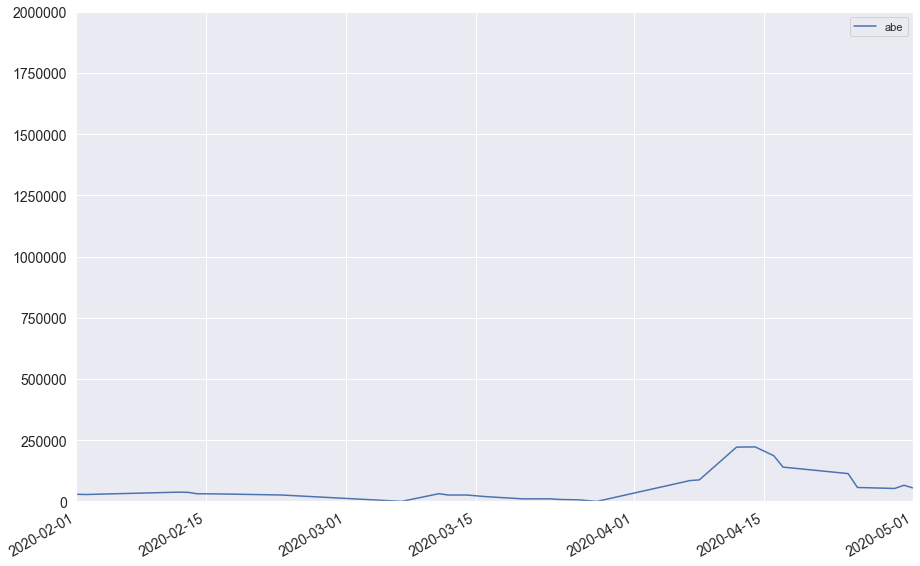

In [71]:
ab = dataframe_mean_week_abe.plot(y=['favorites_count'],figsize=(15,10),fontsize=14)
ab.legend(["abe"])
plt.ylim(0, 2000000)
plt.xlim([datetime.date(2020, 2, 1), datetime.date(2020, 5, 1)])

##### Trump

(18293, 18383)

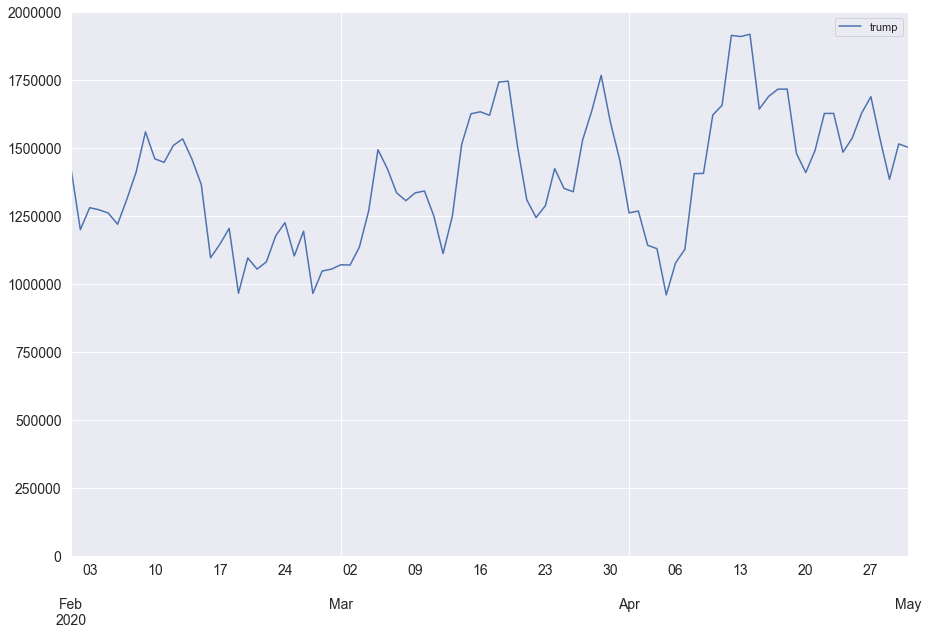

In [72]:
dt = dataframe_mean_week_trump.plot(y=['favorites_count'], figsize=(15,10),fontsize=14)
dt.legend(["trump"])
plt.ylim(0, 2000000)
plt.xlim([datetime.date(2020, 2, 1), datetime.date(2020, 5, 1)])

##### Johnson

(737456.0, 737546.0)

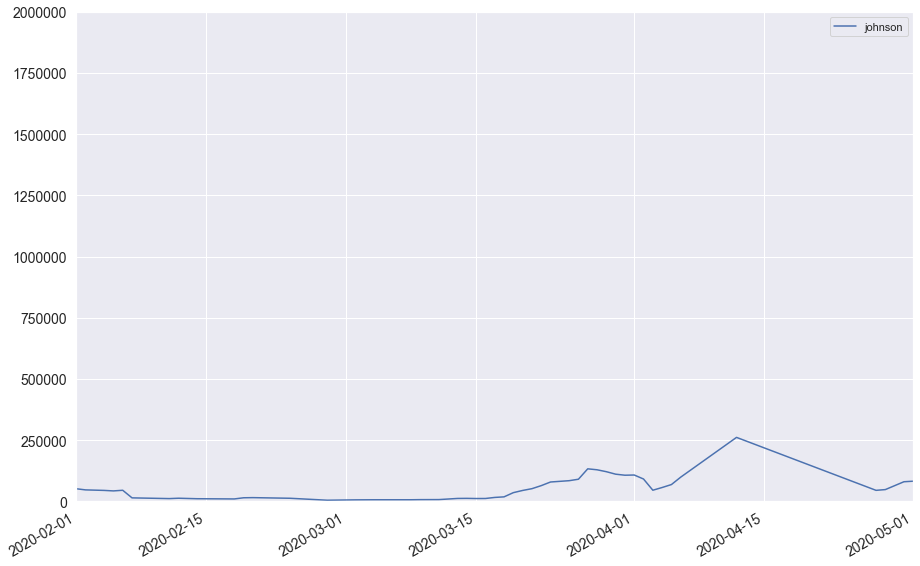

In [73]:
bj = dataframe_mean_week_johnson.plot(y=['favorites_count'], figsize=(15,10),fontsize=14)
bj.legend(["johnson"])
plt.ylim(0, 2000000)
plt.xlim([datetime.date(2020, 2, 1), datetime.date(2020, 5, 1)])

### Tweet Count about Corona 

##### Abe

(737456.0, 737546.0)

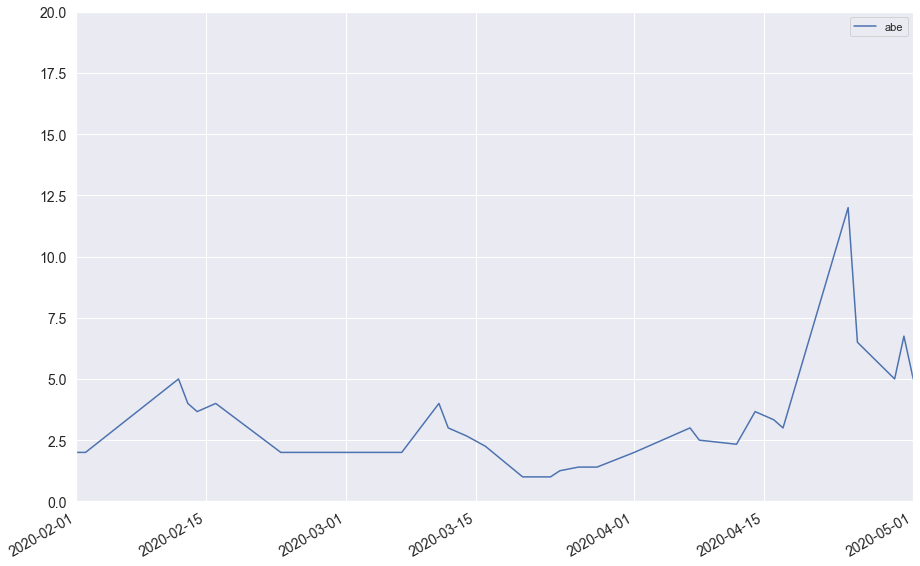

In [76]:
ab = dataframe_mean_week_abe_c.plot(y=['text'],figsize=(15,10),fontsize=14)
ab.legend(["abe"])
plt.ylim(0, 20)
plt.xlim([datetime.date(2020, 2, 1), datetime.date(2020, 5, 1)])

##### Trump

(18293, 18383)

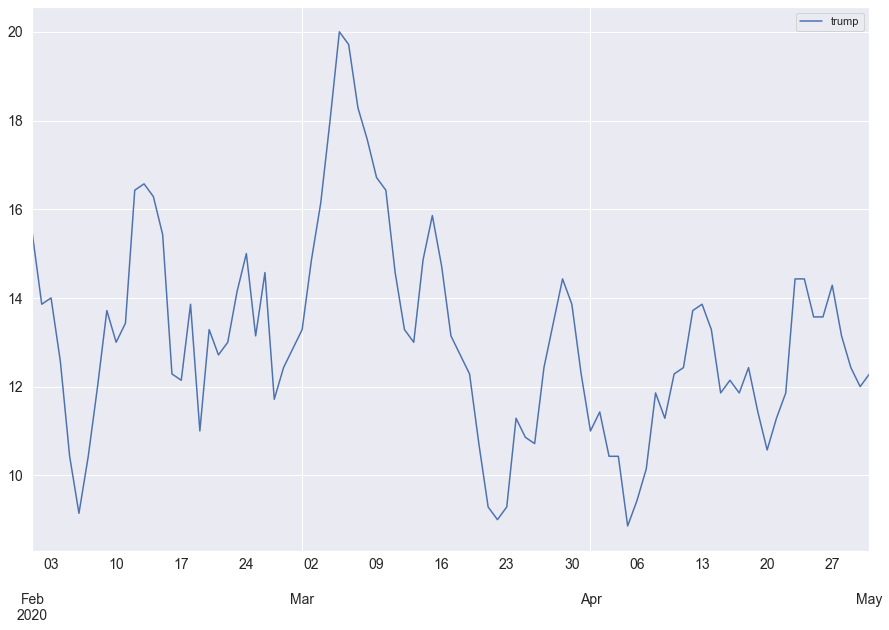

In [69]:
dt = dataframe_mean_week_trump_c.plot(y=['text'],figsize=(15,10),fontsize=14)
dt.legend(["trump"])
plt.xlim([datetime.date(2020, 2, 1), datetime.date(2020, 5, 1)])

##### Johnson

(737456.0, 737546.0)

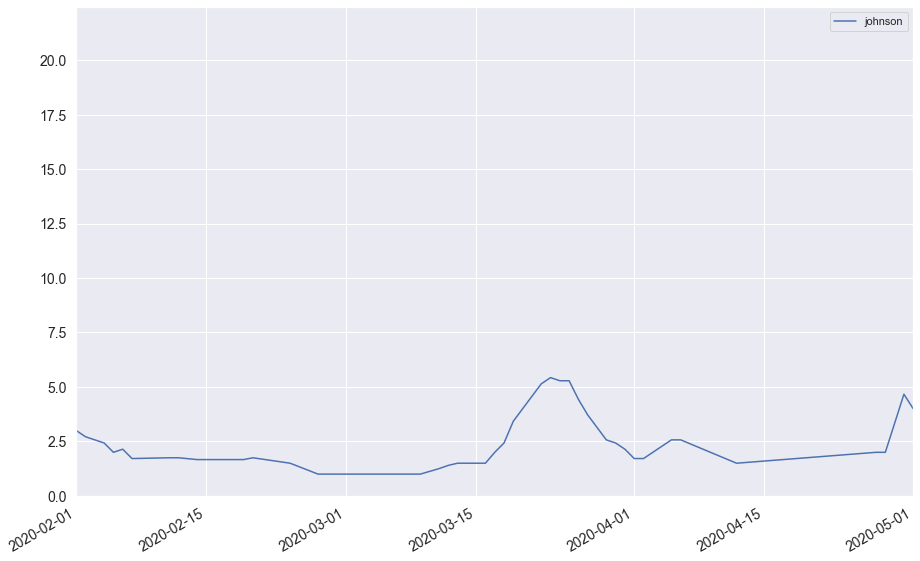

In [75]:
bj = dataframe_mean_week_johnson_c.plot(y=['text'],figsize=(15,10),fontsize=14)
bj.legend(["johnson"])
plt.xlim([datetime.date(2020, 2, 1), datetime.date(2020, 5, 1)])

### Text Analysis

In [290]:
trump_text = " ".join(review for review in df_trump.text)

In [357]:
stopwords = set(STOPWORDS)
stopwords.update(["https", "co", "we", "he", "she", "will","We ","We","He", "She", "amp", "today","and","going","if","If"])

##### Trump- normal

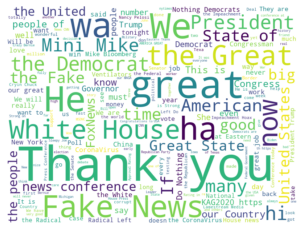

In [388]:
# Create and generate a word cloud image:
wordcloud = WordCloud(background_color="white",stopwords=stopwords,width=800, height=600).generate(trump_text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

##### Johnson -normal

In [311]:
johnson_text = " ".join(review for review in df_trump.text)

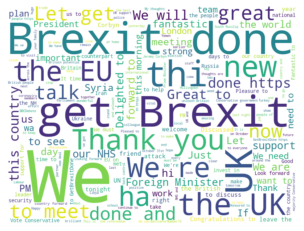

In [386]:
# Create and generate a word cloud image:
wordcloud = WordCloud(background_color="white",stopwords=stopwords,width=800, height=600).generate(johnson_text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

##### Trump - during the pandemic

In [348]:
trump_text_c = " ".join(review for review in df_trump_c.text)

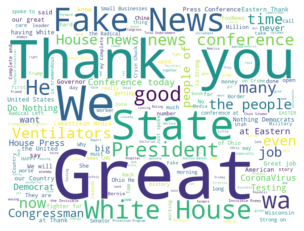

In [387]:
# Create and generate a word cloud image:
wordcloud = WordCloud(background_color="white",stopwords=stopwords,width=800, height=600).generate(trump_text_c)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

##### Johnson - during the pandemic

In [350]:
johnson_text_c = " ".join(review for review in df_johnson_c.text)

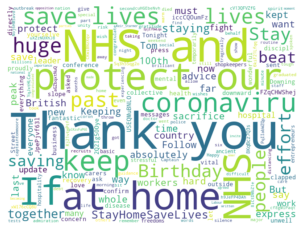

In [384]:
# Create and generate a word cloud image:
wordcloud = WordCloud(background_color="white",stopwords=stopwords,width=800, height=600).generate(johnson_text_c)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
import re
text = " ".join(review for review in df_abe.text)

'''---------
a-Zを全て削除
---------'''
romaji = re.compile("[a-zA-Z]+")
text = romaji.sub("", text)


'''--------------------
3文字以下の カタカナ を削除
--------------------'''
found_katanaka_list = []
four_text_list = []
pos = 0
katanaka_pattern = re.compile('[ァ-ヴ]+')

while True:

    match1 = katanaka_pattern.search( text, pos )

    if match1 == None:
        break

    # 見つかったカタカナの後からループ開始
    pos = match1.end( 0 )

    found_katanaka_list.append(match1[0])

for katakana_words in found_katanaka_list:

    # 文字数指定
    if len(katakana_words) >= 4:
        four_text_list.append(katakana_words)

text = katanaka_pattern.sub(" ", text)

for katakana in four_text_list:
    text += " " + katakana + " "


'''--------------------
4文字以下の ひらがな を削除
--------------------'''
found_hiragana_list = []
five_text_list = []
pos = 0
hiragana_pattern = re.compile('[ぁ-ん]+')

while True:

    match2 = hiragana_pattern.search( text, pos )

    if match2 == None:
        break

    pos = match2.end( 0 )

    found_hiragana_list.append(match2[0])

for hiragana_words in found_hiragana_list:

    # 文字数指定
    if len(hiragana_words) >= 5:
        five_text_list.append(hiragana_words)

text = hiragana_pattern.sub(" ", text)

for hiragana in five_text_list:
    text += " " + hiragana + " "


'''----------------
2文字以下の 漢字 を削除
----------------'''
found_kanzi_list = []
three_text_list = []
pos = 0
kanzi_pattern = re.compile('[一-龥]+')

while True:

    match3 = kanzi_pattern.search( text, pos )

    if match3 == None:
        break

    pos = match3.end( 0 )
    found_kanzi_list.append(match3[0])

for kanzi_words in found_kanzi_list:

    # 文字数指定
    if len(kanzi_words) >= 3:
        three_text_list.append(kanzi_words)

text = kanzi_pattern.sub(" ", text)

for kanzi in three_text_list:
    text += " " + kanzi + " "


stop = ["においては", "については","についても","であります","しています","えています"]
wordcloud = WordCloud(background_color="white",
                      stopwords = stop,

                      font_path="/system/Library/Fonts/ヒラギノ角ゴシック W4.ttc",
                      width=800, height=600).generate(text)

##### Abe - during the pandemic

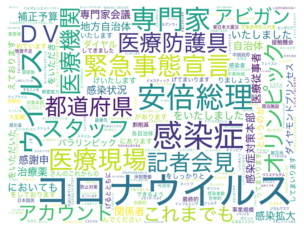

In [383]:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()